# Universal Portfolio with Hints from a Noisy Oracle

First, do some initialization and set debugging level to `debug` to see progress of computation.

In [194]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

import universal as up
from universal import tools, algos, hints
from universal.result import ListResult
from universal.algos import *
from universal.hints import *

sns.set_context("notebook")
plt.rcParams["figure.figsize"] = (16, 8)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# ignore logged warnings
import logging
logging.getLogger().setLevel(logging.ERROR)

Let's try to replicate the results of B.Li and S.Hoi from their article [On-Line Portfolio Selection with Moving Average Reversion](http://arxiv.org/abs/1206.4626). They claim superior performance on several datasets using their OLMAR algorithm. These datasets are available in `data/` directory in `.csv` format. Those are all raw prices and artificial tickers. We can start with NYSE stocks from period 1/1/1985 - 30/6/2010.

In [299]:
# load data using tools module
data = tools.dataset('nyse_o')  # nyse_o
# data = data.iloc[:]

# plot first three of them as example
# data.iloc[:,:3].plot()

In [300]:
hinter = hints.ShakyOracle(data.shape[1])

In [301]:
# set algo parameters
np.random.seed(123)
algo = algos.Hinted(ll=1,
                    unhinted_strategy=algos.UP(),
                    hinted_strategy=algos.Greedy(),
                    how='add', 
                    hinter=hinter,
                    min_history=0)
bcrp = algos.BCRP()
ucrp = algos.CRP()
up = algos.UP()
upsi = algos.UPSI(hinter=hinter)

# run
results = [algo.run(data), up.run(data), upsi.run(data), bcrp.run(data), ucrp.run(data)]
names = ['PORTFOLIO', 'UP', 'UPSI', 'BCRP', 'UCRP']
results = ListResult(results, names)

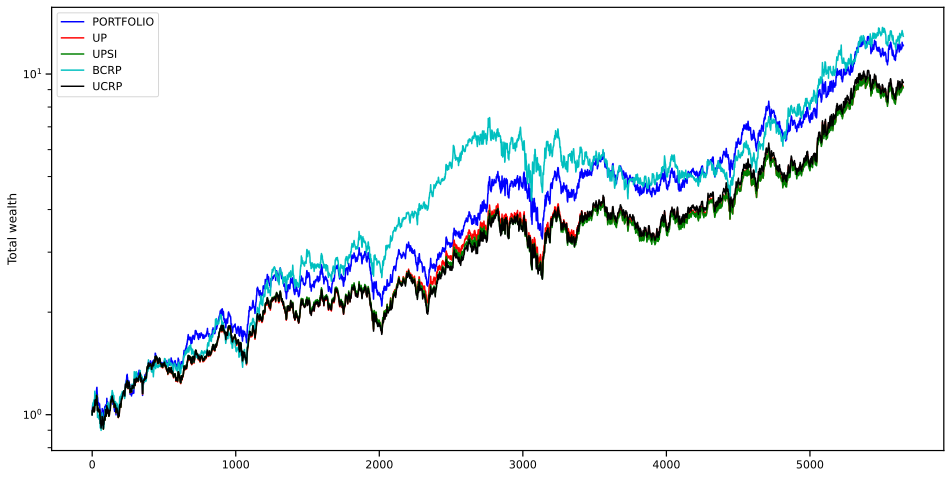

In [302]:
# print(results.summary())
results.plot(ucrp=False, logy=True, color=['b','r','g', 'c','k']);

<Axes: >

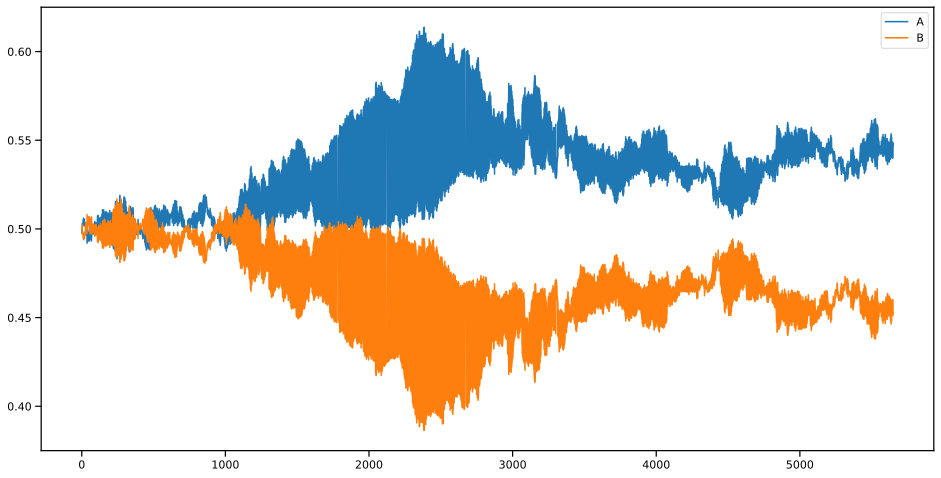

In [303]:
results[2].B.plot.line()

## Simple Price Prediction

Make sure the MA predictor works with a short example

In [262]:
dtest = data.iloc[:, :2]
dtest_rel = dtest.iloc[1:, :].values / dtest.iloc[:-1, :].values

In [261]:
predictor = hints.MAPredictor(2, 5)

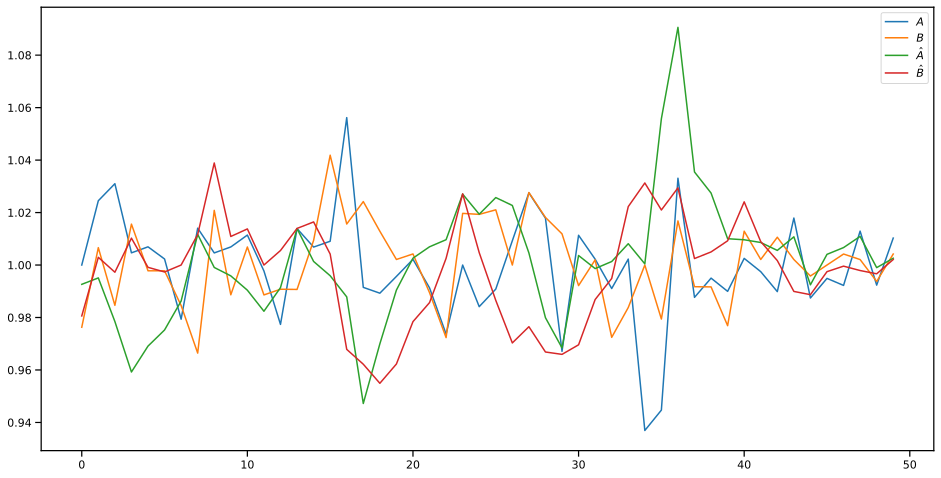

In [289]:
g = sns.lineplot()
g.plot(dtest_rel[1:51], label=[r'$A$', r'${B}$'])
g.plot(pred[:50], label=[r'$\hat{A}$', r'$\hat{B}$'])
plt.legend()

Performance with OLMA predictor

In [296]:
data = tools.dataset('sp500')  # nyse_o

In [297]:
# set algo parameters
np.random.seed(123)
algo = algos.Hinted(ll=1,
                    unhinted_strategy=algos.UP(),
                    hinted_strategy=algos.Greedy(),
                    how='add', 
                    hinter=predictor,
                    min_history=1)
bcrp = algos.BCRP()
ucrp = algos.CRP()
up = algos.UP()
upsi = algos.UPSI(hinter=predictor)
olmar = algos.OLMAR()

# run
pred_results = [algo.run(data), up.run(data), upsi.run(data), bcrp.run(data), ucrp.run(data), olmar.run(data)]
names = ['PORTFOLIO', 'UP', 'UPSI', 'BCRP', 'UCRP', 'OLMAR']
pred_results = ListResult(pred_results, names)

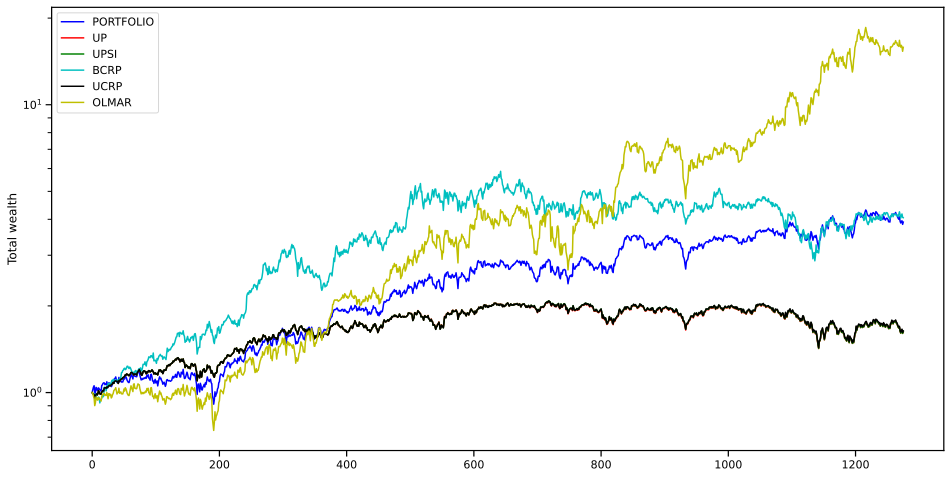

In [298]:
pred_results.plot(ucrp=False, logy=True, color=['b','r','g', 'c','k', 'y']);